___
# Atividade: Modelos probabilísticos contínuos e Dados
___



## Lucas Chen Alba




## Aula 14

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 201).
2. Executar o arquivo `Aula13 Modelos probabilísticos contínuos.ipynb`
3. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de quantis ou QQplot (pág. 27 - Exemplo 1.10 e 1.11).
4. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de probabilidade (similar ao gráfico QQplot) (pág. 201 a 204) - Exemplo 6.10).

**Hoje:**
1. Reforçar mais ferramentas para Análise Descritiva
2. Avaliar, descritivamente, adequação da normal aos dados.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

___
## <font color='blue'>Padaria </font>

Uma empresa deve decidir onde construir uma padaria: <font color='green'>Bairro A </font> ou <font color='orange'> Bairro B </font>. 

Como ambos os bairros possuem densidades populacionais próximas, os investidores visam atingir um público alvo de maior renda familiar. 
Assim, quanto maior o número de famílias com rendas familiares mais altas, maior será a chance do empreendimento ser bem sucedido. 

Considerando que a decisão final seja baseada em informações sobre a renda familiar dos moradores desses dois bairros, responda:

1. Calcule algumas medidas resumo úteis para entender o comportamento dessa variável em ambos os bairros. Analise.

2. Construa o histograma dos dados e compare as distribuições de renda familiar (em mil reais) dos dois bairros. Qual é o melhor bairro para construir a padaria? Justifique.

3. Construa o QQ-Plot considerando quantil amostral do Bairro A vs quantil amostral do Bairro B. Esse gráfico de quantis amostrais auxilia a responder qual é o melhor bairro para construir a padaria? Justifique claramente.
   Dica: veja construção desse gráfico no Magalhães e Lima (7ª edição) - pág. 27 e 29.

3. Assuma que $X$: renda familiar de um determinado bairro tenha $\mu$ estimada pela média amostral ($\bar{x}$) e tenha $\sigma^2$ estimada pela variância amostral, ambas de um mesmo bairro em questão. Verifique, visualmente/graficamente, se a distribuição normal é adequada para estimar a renda familiar de cada bairro. Para isso, interprete os seguintes gráficos:
      1. Construa o histograma dos dados junto com a fdp da distribuição normal e analise.
      
      2. Construa o Gráfico de probabilidade considerando o quantil amostral vs o quantil teórico da distribuição normal. Interprete esse gráfico com intuito de avaliar se: A renda de cada bairro é bem modelada por uma distribuição normal?
      Dica: veja Exemplo 6.8 do Magalhães e Lima (7ª. edição) de como obter as frequências relativas acumuladas a partir de uma amostra de tamanho n=500 (de cada bairro). Os quantis teóricos da distribuição normal podem ser obtidos pelo comando `stats.norm.ppf(p, loc=mu, scale=sigma)`, sendo `p` a frequencia relativa acumulada  obtida anteriormente.
      
      4. Construa um gráfico dos valores observados vs frequência relativa acumulada (a partir dos dados) e vs função de distribuição acumulada.
   
4. Independente da sua resposta do item anterior, assuma que $X$: renda familiar de um determinado bairro segue uma distribuição normal considerando as estimativas amostrais como valores dos parâmetros de cada bairro. Nesse caso, para cada bairro, calcule:
      1. probabilidade de uma família possuir renda familiar maior do que 17 mil reais.

      2. sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, qual a probabilidade dessa possuir renda inferior a 16 mil reais.
      
      3. qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 



In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var, arange
import numpy as np
from matplotlib import pyplot

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\APS\APS 5


In [3]:
dados = pd.read_excel('Padaria.xlsx')

# 1

In [4]:
#Definindo o dadosors, novo dataframe ordenado
dadosord = pd.DataFrame()
dadosord['A'] = sorted(dados.A)
dadosord['B'] = sorted(dados.B)

In [5]:
dadosord.A.describe()

count    500.000000
mean      15.321676
std        0.592599
min       13.450880
25%       14.919380
50%       15.335840
75%       15.702140
max       17.151280
Name: A, dtype: float64

In [6]:
dadosord.B.describe()

count    500.000000
mean      14.221997
std        1.840182
min        9.704160
25%       12.843832
50%       14.348205
75%       15.770295
max       18.911520
Name: B, dtype: float64

Percebemos pela análise dos dados, que como dito no enunciado foram selecionadas quantidades iguais de famílias pela proximidade na população de famílias. Percebemos também que a renda média das famílias das duas regioes é parecida o desvio padrão da renda das famílias da região A é bem menor do que o desvio padrão da renda das famílias da região B, nos revelando que as famílias da região B possuem uma renda mais proxima da média, já as famílias da região A estão mais distantes, no geral, da média de renda.
______________-

# 2

In [7]:
faixarenda = np.arange(9,19,.5)

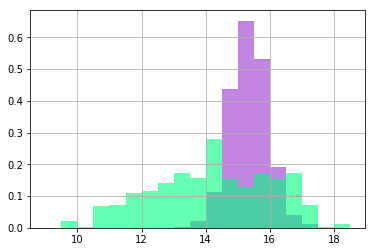

In [8]:
dadosord.A.hist(bins = faixarenda, color = "DarkOrchid", alpha = 0.6, normed = 1)
dadosord.B.hist(bins = faixarenda, color = "SpringGreen", alpha = 0.6, normed = 1)

Pela minha análise, o melhor bairro para se construir a padaria, considerando a região que teria mais dinheiro para gastar na padaria, seria a região A. Como podemos perceber, a região B possui uma maior quantidade de famílias com rendas muito altas, já a região A possui praticamente todas as famílias com rendas em torno de 15 e 16 mil reais. Concluindo, se a padaria quer uma população mais rica, porém em menos quantidade, deverá escolher o bairro B, se ela quer uam maior homogeneidade nos clientes, deverá escolher a região A.
_____________

# 3

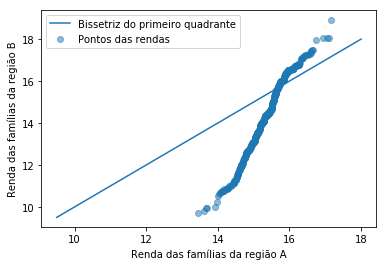

In [9]:
#N = ['b', 'g', 'r', 'y', 'm', 'c']
#colors = np.random.rand(N)
plt.scatter(dadosord.A, dadosord.B, alpha=0.5, label = 'Pontos das rendas')
plt.plot ([9.5, 18], [9.5, 18], label = 'Bissetriz do primeiro quadrante')
plt.xlabel('Renda das famílias da região A')
plt.ylabel('Renda das famílias da região B')
pyplot.legend(loc = 'best')

A partir da leitura do gráfico acima, continuo com a opinião de que se a padaria prefere uma maior homogeneidade, fique com a região A, se ele prefere uma população mais rica, fique com a região B, sabendo que os clientes estarão em menor quantidade. Isso se justifica pois podemos perceber que a maioria das famílias na região A possuem uma renda maior do que as famílias da região B. A região B apenas tem renda maior que a região A para rendas altas (aproximadamente maior de 15 mil reais).
_____________

# 4

## 4-A

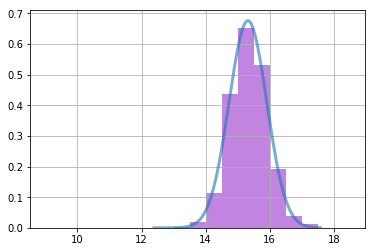

In [10]:
dadosord.A.hist(bins = faixarenda, color = "DarkOrchid", alpha = 0.6, normed = 1)
x = sorted(stats.norm.rvs(size = 10000, loc = 15.32, scale = 0.59))
plt.plot(x, stats.norm.pdf(x, loc = 15.32, scale = 0.59), lw = 3, alpha = 0.6)

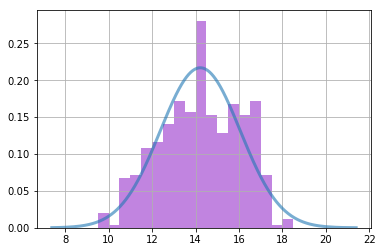

In [11]:
dadosord.B.hist(bins = faixarenda, color = "DarkOrchid", alpha = 0.6, normed = 1)
y = sorted(stats.norm.rvs(size = 10000, loc = 14.22, scale = 1.84))
plt.plot(y, stats.norm.pdf(y, loc = 14.22, scale = 1.84), lw = 3, alpha = 0.6)


## 4-B

In [30]:
freqrelat = []
for i in range (1, 501):
    freqrelat.append ((i-0.5)/500)

In [31]:
freqnormalA = []
for i in dadosord.A:
    freqnormalA.append(stats.norm.cdf (i, loc = 15.32, scale = 0.59))

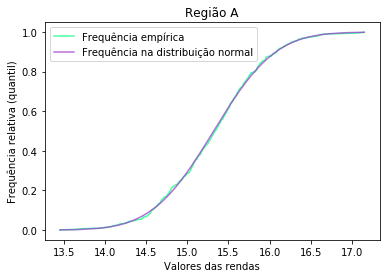

In [32]:
plt.plot (dadosord.A, freqrelat, lw = 1.5, color = 'SpringGreen', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dadosord.A, freqnormalA, lw = 1.5, color = 'DarkOrchid', alpha = 0.7, label = 'Frequência na distribuição normal')
pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das rendas')
plt.title ('Região A')

In [19]:
freqnormalB = []
for i in dadosord.B:
    freqnormalB.append(stats.norm.cdf (i, loc = 14.22, scale = 1.89))

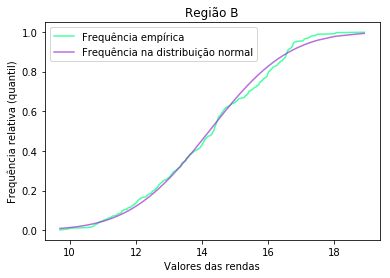

In [20]:
plt.plot (dadosord.B, freqrelat, lw = 1.5, color = 'SpringGreen', alpha = 0.7, label = 'Frequência empírica')
plt.plot (dadosord.B, freqnormalB, lw = 1.5, color = 'DarkOrchid', alpha = 0.7, label = 'Frequência na distribuição normal')
pyplot.legend (loc = 'best')
plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das rendas')
plt.title ('Região B')

Pela análise dos gráficos acima, percebemos que as probabilidades relativas das rendas da região A se aproximam bastante com as de uma distribuição normal. Já as da região B se diferenciam um pouco mais. Concluímos que a região A será descrita quase que perfeitamente (claro que dependendo da precisão requerida) em uma distribuição normal e a região B pode ser descrita em uma normal porém com uma margem de erro maior.
___________

# 5

## 5-A

In [21]:
print ('Probabilidade de uma família da região A ter uma renda maior que 17 mil reais:', 1- (stats.norm.cdf (17, loc = 15.32, scale = 0.59)))
print ('Probabilidade de uma família da região A ter uma renda maior que 17 mil reais:', 1- (stats.norm.cdf (17, loc = 14.22, scale = 1.84)))

Probabilidade de uma família da região A ter uma renda maior que 17 mil reais: 0.00220349802791
Probabilidade de uma família da região A ter uma renda maior que 17 mil reais: 0.0654108432105


## 5-B

In [22]:
print ('Probabilidade de uma família da região A ter uma renda maior que 16 mil reais dado que ela possui uma renda > 15 mil reais:', (((stats.norm.cdf (16, loc = 15.32, scale = 0.59) - (stats.norm.cdf (15, loc = 15.32, scale = 0.59)))/((stats.norm.cdf (18, loc = 15.32, scale = 0.59))-(stats.norm.cdf (15, loc = 15.32, scale = 0.59))))))
print ('Probabilidade de uma família da região B ter uma renda maior que 16 mil reais dado que ela possui uma renda > 15 mil reais:', (((stats.norm.cdf (16, loc = 14.22, scale = 1.84) - (stats.norm.cdf (15, loc = 14.22, scale = 1.84)))/((stats.norm.cdf (18, loc = 14.22, scale = 1.84))-(stats.norm.cdf (15, loc = 14.22, scale = 1.84))))))

Probabilidade de uma família da região A ter uma renda maior que 16 mil reais dado que ela possui uma renda > 15 mil reais: 0.823642789111
Probabilidade de uma família da região B ter uma renda maior que 16 mil reais dado que ela possui uma renda > 15 mil reais: 0.535519446891


## 5-C

In [23]:
print ('Renda da família com menor renda dentro dos 5% com maior renda da região A:', stats.norm.ppf (0.95, loc = 15.32, scale = 0.59))

Renda da família com menor renda dentro dos 5% com maior renda da região A: 16.2904636399


In [24]:
print ('Renda da família com menor renda dentro dos 5% com maior renda da região B:', stats.norm.ppf (0.95, loc = 14.22, scale = 1.84))

Renda da família com menor renda dentro dos 5% com maior renda da região B: 17.2465306736


In [25]:
freqrelat.index(0.949)
print ('Obtidos apenas pelo índex da lista, sem utilizar a normal')
print ('Renda da família com menor renda dentro dos 5% com maior renda da região A:', dadosord.A[475])
print ('Renda da família com menor renda dentro dos 5% com maior renda da região B:', dadosord.B[475])

Obtidos apenas pelo índex da lista, sem utilizar a normal
Renda da família com menor renda dentro dos 5% com maior renda da região A: 16.27744
Renda da família com menor renda dentro dos 5% com maior renda da região B: 16.8498


____________
Podemos perceber que calculando o valor da renda da família com menos renda entre os 5% mais ricos da região A utilizando só o index da lista, nos retorna um valor parecido do valor obtido utilizando a normal, podemos justificar isso pelo gráfico obtido dos quantis anteriormente, a região A se encaixa bem na distribuição normal. Já a região B nos deu 16.8498 contra 17.2465 obtida a partir da distribuição normal, isso se da pois a região B se encaixa na distribuição normal porém com uma precisão menor.